Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.


The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. What's the distribution of the target, `price`, and features such as `longitude` and `latitude`? Remove outliers.
- [ ] After you remove outliers, what is the mean price in your subset of the data?
- [ ] Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [101]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module1')

Reinitialized existing Git repository in /content/.git/
fatal: remote origin already exists.
From https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification
 * branch            master     -> FETCH_HEAD
Already up to date.


In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv('../data/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [104]:

df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Descriptive statistic of data

In [0]:
import pandas_profiling

# Get panda profile report
#df.profile_report()

##Data Cleaning

In [106]:
df.describe(include= 'all')

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,49352.00000,49352.000000,49352,47906,49217,49352.000000,49352.000000,4.935200e+04,49342,49352,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.00000
unique,NaN,NaN,48675,38243,8825,NaN,NaN,NaN,15357,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2016-05-18 01:36:49,,Broadway,NaN,NaN,NaN,3333 Broadway,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,3,1647,438,NaN,NaN,NaN,174,34284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.21218,1.541640,NaN,NaN,NaN,40.741545,-73.955716,3.830174e+03,NaN,NaN,0.525126,0.476982,0.476759,0.446486,0.424887,0.413965,0.365983,0.052541,0.268520,0.185423,0.177055,0.132821,0.138677,0.104089,0.087190,0.060686,0.055357,0.051852,0.046847,0.043929,0.042612,0.039370,0.027517,0.02620
std,0.50142,1.115018,NaN,NaN,NaN,0.638535,1.177912,2.206687e+04,NaN,NaN,0.499373,0.499475,0.499465,0.497133,0.494331,0.492547,0.481710,0.223117,0.443194,0.388644,0.381719,0.339385,0.345613,0.305379,0.282116,0.238757,0.228679,0.221730,0.211313,0.204940,0.201983,0.194476,0.163585,0.15973
min,0.00000,0.000000,NaN,NaN,NaN,0.000000,-118.271000,4.300000e+01,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.00000,1.000000,NaN,NaN,NaN,40.728300,-73.991700,2.500000e+03,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.00000,1.000000,NaN,NaN,NaN,40.751800,-73.977900,3.150000e+03,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.00000,2.000000,NaN,NaN,NaN,40.774300,-73.954800,4.100000e+03,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [107]:
# From Pandas profiling report there is missing values
# check for missing values
# less than 5% of the data is missing so we can drop na
df.isna().sum()

bathrooms                  0
bedrooms                   0
created                    0
description             1446
display_address          135
latitude                   0
longitude                  0
price                      0
street_address            10
interest_level             0
elevator                   0
cats_allowed               0
hardwood_floors            0
dogs_allowed               0
doorman                    0
dishwasher                 0
no_fee                     0
laundry_in_building        0
fitness_center             0
pre-war                    0
laundry_in_unit            0
roof_deck                  0
outdoor_space              0
dining_room                0
high_speed_internet        0
balcony                    0
swimming_pool              0
new_construction           0
terrace                    0
exclusive                  0
loft                       0
garden_patio               0
wheelchair_access          0
common_outdoor_space       0
dtype: int64

In [0]:
df= df.dropna(axis=0)

From data profiling price is highly skewed, so let's check for price distribution

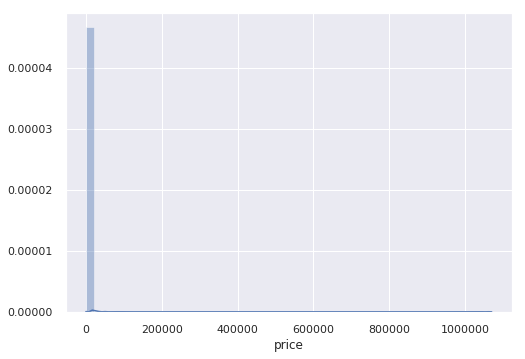

In [109]:
import seaborn as sns
sns.set() 
# plot the probablity distribution of  price
# Price has outliers(observation that lie on abnormal distance from other observation of the data)
sns.distplot(df['price']);

In [110]:
df.price.describe()

count    4.777200e+04
mean     3.716743e+03
std      7.353254e+03
min      4.300000e+01
25%      2.497000e+03
50%      3.150000e+03
75%      4.100000e+03
max      1.070000e+06
Name: price, dtype: float64

In [135]:
# check the miximum sal price
# This apartment has only 1 bathroom and 2 bedrooms 
# aparment has no address descripion
df.query('price == 4490000')

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
19558,1.0,2,2016-06-24 05:02:11,NaN,Hudson Street,40.7299,-74.0071,4490000,421 Hudson Street,low,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [0]:
# Price is hard to read in scientific notation
# Format the numbers: comma seperator for thousand and zero decimal
#pd.options.display.float_format = '{:,.4f}'.format
#df.price.describe()

In [113]:
# check min sell price
# this apartment has only bathroom nad no bedroom
# address description is missing
df.query('price==43')

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
28626,1.0,0,2016-05-24 05:24:56,<p><a website_redacted,Madison,40.712,-73.9971,43,60 Madison,low,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [115]:
# check the range of price from 1 to 99 percentile
df['price'].quantile([0.01,0.5, 0.99])

0.01     1493.26
0.50     3150.00
0.99    13000.00
Name: price, dtype: float64

In [116]:
# we can remove the outlier
# we can remove 1% of the obsevation  using quantile method
q_99 = df['price'].quantile(0.99)
q_1 = df['price'].quantile(0.01)
#df = df.query('price < q')
df= df[(df['price']>= q_1) & (df['price']<= q_99)]
df.price.describe()

count    46827.000000
mean      3536.823051
std       1598.634622
min       1495.000000
25%       2500.000000
50%       3150.000000
75%       4065.000000
max      13000.000000
Name: price, dtype: float64

# For latitude and longitude
Latitude and Longitude are the units that represent the coordinates at geographic coordinate system. to get the address of city or street

In [117]:
  df['latitude'].describe()

count    46827.000000
mean        40.741294
std          0.627221
min          0.000000
25%         40.728200
50%         40.751600
75%         40.773500
max         43.034600
Name: latitude, dtype: float64

In [118]:
df['longitude'].describe()

count    46827.000000
mean       -73.956540
std          1.156416
min       -118.271000
25%        -73.991900
50%        -73.978100
75%        -73.955150
max          0.000000
Name: longitude, dtype: float64

In [119]:
# scatter plot
import plotly.express as px

px.scatter(df, x = 'latitude', y='longitude')

From scatter plot we have two outlier for two different location(0,0) and (34.0126, -118.271) let's see those two location

In [120]:
df[(df['latitude']== 0) & (df['latitude']== 0)]
#df.shape

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
2787,5.0,6,2016-04-18 02:14:51,***NO BROKER FEE***<BR><BR>Situated on a gorge...,Decatur Street,0.0,0.0,9995,259 Decatur Street,low,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
14104,1.0,1,2016-05-31 22:26:06,Gorgeous one bedroom in Sunset Park-Private en...,"Sunset Park, Brooklyn",0.0,0.0,1750,145 28 Street,low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21715,1.0,1,2016-06-01 19:59:46,Big 2 bedroom in clean and quite multi family ...,88 van Sicklen street,0.0,0.0,1725,Van Sicklen street,low,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22471,1.0,2,2016-06-16 15:38:11,Flatiron Duplex!At the intersection of Flatiro...,"Flatiron, Kips Bay, Gramercy",0.0,0.0,4395,219 E 28th,low,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
25860,1.0,2,2016-05-07 08:15:32,Spacious and bright 2 bedroom fully renovated ...,Madison Ave,0.0,0.0,2950,1632 Madison Ave,medium,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
27181,1.0,2,2016-05-10 10:25:19,"New construction, luxury highrise, The two bed...",24th St LIC,0.0,0.0,3619,41-42 24th St,low,1,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
34390,1.0,1,2016-05-10 14:30:12,NO FEE! Spacious one bedroom apartment in a F...,west 87,0.0,0.0,3600,247 west 87,low,1,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35826,1.0,2,2016-05-24 17:43:39,Fantastic 2 bed with the works! It has 2 queen...,118 W 109th,0.0,0.0,3200,118 W 109th,low,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
36448,1.0,1,2016-05-10 10:11:20,No fee! Prime NOLITA neighborhood with amazing...,Mott St,0.0,0.0,3495,246 Mott St,low,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39199,1.0,2,2016-05-26 14:19:38,"*Mgmt is accepting June 1st, 15th, July 1st, o...",106th/Central Park,0.0,0.0,3200,21 W 106th,low,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


It would be hard to say about location without latitude and longitude(0,0) and street address without zipcode give very little information so we can remove the outlier

In [0]:
# let's see 1 to 99 percentile quantitle
def get_quantile(df, col, n):
    
    return df[df[col].quantile(n)]

In [0]:
df= df[(df['latitude'] >= df['latitude'].quantile(0.01)) & (df['latitude'] <= df['latitude'].quantile(0.99))]

In [123]:
df.latitude.describe()

count    45892.000000
mean        40.750664
std          0.034500
min         40.644800
25%         40.728700
50%         40.751600
75%         40.772900
max         40.855400
Name: latitude, dtype: float64

In [124]:
df.longitude.describe()

count    45892.000000
mean       -73.973517
std          0.028113
min        -74.663700
25%        -73.991900
50%        -73.978400
75%        -73.955900
max        -73.700100
Name: longitude, dtype: float64

In [125]:
px.scatter(df, x = 'latitude', y='longitude')

## Bedroom and Bathroom features

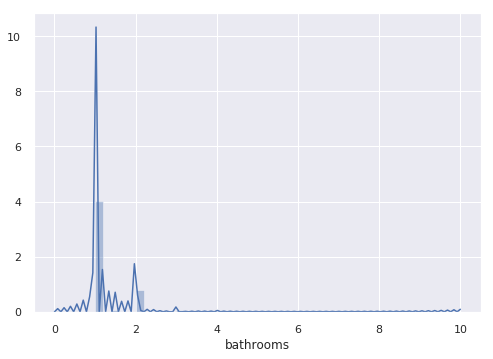

In [126]:
sns.distplot(df['bathrooms'])

In [0]:
# remove the outlier with 1 to 99% quantile
df= df[(df['bathrooms'] >= df['bathrooms'].quantile(0.01)) & (df['bathrooms'] <= df['bathrooms'].quantile(0.99))]

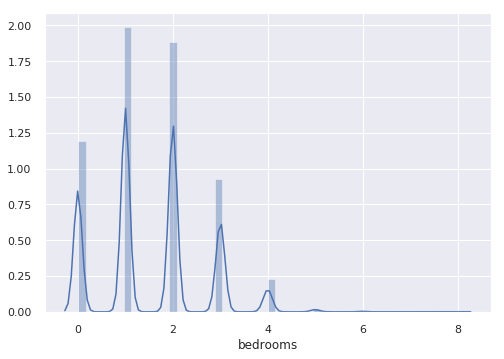

In [128]:
# distribution of the bedrooms
sns.distplot(df['bedrooms'])

In [0]:
df= df[(df['bedrooms'] >= df['bedrooms'].quantile(0.01)) & (df['bedrooms'] <= df['bedrooms'].quantile(0.99))]

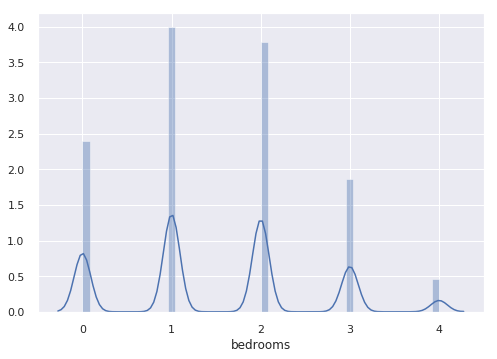

In [130]:
sns.distplot(df['bedrooms'])

In [131]:
df.describe()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,45285.000000,45285.000000,45285.000000,45285.000000,45285.000000,45285.000000,45285.000000,45285.000000,45285.000000,45285.000000,45285.000000,45285.000000,45285.000000,45285.000000,45285.000000,45285.000000,45285.000000,45285.000000,45285.000000,45285.000000,45285.000000,45285.000000,45285.000000,45285.000000,45285.000000,45285.00000,45285.000000,45285.000000,45285.000000
mean,1.194700,1.520084,40.750587,-73.973567,3535.660174,0.525936,0.478260,0.500961,0.446704,0.435442,0.432682,0.381186,0.053704,0.273291,0.191587,0.181296,0.140267,0.143734,0.105002,0.092812,0.060439,0.057679,0.055029,0.047256,0.030385,0.04443,0.040764,0.028685,0.027161
std,0.423305,1.073619,0.034456,0.028151,1539.690426,0.499332,0.499533,0.500005,0.497157,0.495820,0.495453,0.485683,0.225436,0.445654,0.393554,0.385268,0.347268,0.350824,0.306559,0.290172,0.238302,0.233138,0.228040,0.212189,0.171647,0.20605,0.197745,0.166921,0.162555
min,1.000000,0.000000,40.644800,-74.663700,1495.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,40.728700,-73.992000,2500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,40.751500,-73.978500,3172.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,40.772800,-73.956000,4080.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,3.000000,4.000000,40.855400,-73.700100,13000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


## avg rental price in NYC is 3535k after removal of outlier

##Plot relationship between feature and target